[Home](Home.ipynb)

# Tabular Python (numpy + pandas)

Although numpy's n-dimensional arrays may have as many axes as we like, we're typically working with rows and columns, like a spreadsheet.  We call this a two dimensional array.

Numpy does the number crunching with respect to these arrays.  Pandas provides a DataFrame much like a picture frame around a canvas.  You get to label and reorder rows and columns, will mixing columns (called Series type objects) of different types.

In [1]:
import numpy as np
import pandas as pd

In [4]:
"numpy ver: {}; pandas ver: {}".format(np.__version__, pd.__version__)

'numpy ver: 1.17.3; pandas ver: 1.2.3'

Python's native range type is all fine and good when you want consecutive integers. Thanks to list comprehension syntax, defining floating point inputs at some constant interval is likewise doable.

In [6]:
[i/10 for i in range(1, 11)] # range has no native floating point ability

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

However, numpy introduces two new domain-makers that make life easier yet, in that both return np.ndarray type objects, equipped with all manner of methods.

```arange``` gets a start and up-to-but-not-including argument, followed by the discrete interval between adjacent values.  

In [7]:
np.arange(0.1, 1.1, 0.1) # start, up to, interval

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

```linspace``` is similar, but a third argument specifies how many points should appear between start and stop values.  The stop value is inclusive in this case.

In [8]:
np.linspace(0.1, 1.0, 10) # start, stop, how many

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

### Plotting Polynomials

The cells below may be used as a worksheet.  Try different polynomials with varied domains, tabulating and plotting the results.

In [13]:
x = np.arange(-3, 3.1, 0.1)

In [24]:
y = x**2 - 2*x + 1

A DataFrame may be initialized in several ways, the most straightforward being a shown below, with a dict.  The dict keys are column headers, whereas the values should be numpy arrays with the corresponding column data.

In [25]:
points = pd.DataFrame({"x":x, "y":y})

Notice how pretty the formatting, with middle rows left out.

In [27]:
points

,x,y
0,-3.0,16.00
1,-2.9,15.21
2,-2.8,14.44
3,-2.7,13.69
4,-2.6,12.96
...,...,...
56,2.6,2.56
57,2.7,2.89
58,2.8,3.24
59,2.9,3.61


In [28]:
points.head()

,x,y
0,-3.0,16.00
1,-2.9,15.21
2,-2.8,14.44
3,-2.7,13.69
4,-2.6,12.96


Once we have a DataFrame, we may invoke its plot method directly, with axis labels and title for named arguments.

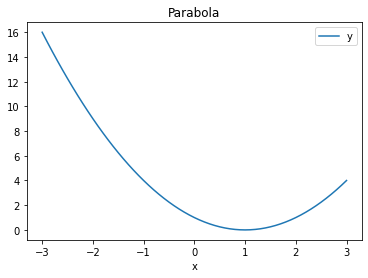

In [26]:
points.plot(x="x", y="y", title="Parabola");